### Objective: Figure out the right people to target for the social media ad campaigns 

In [76]:
# Loading Libraries and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

#Data
df1 = pd.read_csv("Data/test.csv", delimiter=";")
df2 = pd.read_csv("Data/train.csv", delimiter=";")

df = pd.concat([df1, df2], axis=0)

 #Converting columns with two variables into binary 
df.default = df.default.map({'yes': 1, 'no': 0})
df.housing = df.housing.map({'yes': 1, 'no': 0})
df.loan = df.loan.map({'yes': 1, 'no': 0})
df.y = df.y.map({'yes': 1, 'no': 0})

#Replace 'contact' columns name to cellular, and if cellular then 1, and if telephone 0
df.contact = df.contact.map({'cellular': 1, 'telephone': 0})
df.columns = df.columns.str.replace('contact', 'cellular')
df.contact = df.cellular.astype(int, errors='ignore')

## Make pday na if -1
df.pdays.replace(-1, np.nan, inplace=True)

# rename columns
df.rename(columns={
    'age': 'client_age',
    'job': 'job_type',
    'marital': 'marital_status',
    'education': 'education_level',
    'default': 'credit_default',
    'balance': 'avg_yearly_balance_eur',
    'housing': 'housing_loan',
    'loan': 'personal_loan',
    'cellular': 'cellular_contact',
    'day': 'last_contact_day',
    'month': 'last_contact_month',
    'duration': 'last_contact_duration_sec',
    'campaign': 'num_contacts_campaign',
    'pdays': 'days_since_last_contact',
    'previous': 'num_prev_contacts',
    'poutcome': 'prev_campaign_outcome',
    'y': 'subscribed_term_deposit'
}, inplace=True)

print(df.head(5))
# Count unique values and print
employment_counts = df['job_type'].value_counts()

print("Unique employment types and their counts:")
print(employment_counts)

# Define mapping of old categories to new ones
employment_mapping = {
    'management': 'White-Collar',
    'technician': 'White-Collar',
    'admin.': 'White-Collar',
    'self-employed': 'White-Collar',
    'entrepreneur': 'White-Collar',
    
    'blue-collar': 'Blue-Collar',
    'services': 'Blue-Collar',
    'housemaid': 'Blue-Collar',

    'retired': 'Retired/Unemployed',
    'unemployed': 'Retired/Unemployed',

    'student': 'Student'
}

# Apply mapping to DataFrame
df['job_type'] = df['job_type'].map(employment_mapping)

# Define mapping for months to quarters
month_to_quarter = {
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}

# Apply mapping to DataFrame
df['last_contact_month'] = df['last_contact_month'].map(month_to_quarter)
df = df.drop('prev_campaign_outcome', axis=1)
df = df.drop('days_since_last_contact', axis=1)
df.replace("unknown", np.nan, inplace=True)
df.head(5)

   client_age     job_type marital_status education_level  credit_default  \
0          30   unemployed        married         primary               0   
1          33     services        married       secondary               0   
2          35   management         single        tertiary               0   
3          30   management        married        tertiary               0   
4          59  blue-collar        married       secondary               0   

   avg_yearly_balance_eur  housing_loan  personal_loan  cellular_contact  \
0                    1787             0              0               1.0   
1                    4789             1              1               1.0   
2                    1350             1              0               1.0   
3                    1476             1              1               NaN   
4                       0             1              0               NaN   

   last_contact_day last_contact_month  last_contact_duration_sec  \
0          

/var/folders/3c/qc983p5977j3hhqv878r2n1m0000gp/T/ipykernel_56671/794665178.py:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.contact = df.cellular.astype(int, errors='ignore')
/var/folders/3c/qc983p5977j3hhqv878r2n1m0000gp/T/ipykernel_56671/794665178.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.pdays.replace(-1, np.nan, inplace=True)


,client_age,job_type,marital_status,education_level,credit_default,avg_yearly_balance_eur,housing_loan,personal_loan,cellular_contact,last_contact_day,last_contact_month,last_contact_duration_sec,num_contacts_campaign,num_prev_contacts,subscribed_term_deposit
0,30,Retired/Unemployed,married,primary,0,1787,0,0,1.0,19,Q4,79,1,0,0
1,33,Blue-Collar,married,secondary,0,4789,1,1,1.0,11,Q2,220,1,4,0
2,35,White-Collar,single,tertiary,0,1350,1,0,1.0,16,Q2,185,1,1,0
3,30,White-Collar,married,tertiary,0,1476,1,1,NaN,3,Q2,199,4,0,0
4,59,Blue-Collar,married,secondary,0,0,1,0,NaN,5,Q2,226,1,0,0


### EDA: Understanding the Data

In [78]:
# drop NAs
df = df.dropna()
print(df.info()) 
# Print NA count per variable 
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 33971 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   client_age                 33971 non-null  int64  
 1   job_type                   33971 non-null  object 
 2   marital_status             33971 non-null  object 
 3   education_level            33971 non-null  object 
 4   credit_default             33971 non-null  int64  
 5   avg_yearly_balance_eur     33971 non-null  int64  
 6   housing_loan               33971 non-null  int64  
 7   personal_loan              33971 non-null  int64  
 8   cellular_contact           33971 non-null  float64
 9   last_contact_day           33971 non-null  int64  
 10  last_contact_month         33971 non-null  object 
 11  last_contact_duration_sec  33971 non-null  int64  
 12  num_contacts_campaign      33971 non-null  int64  
 13  num_prev_contacts          33971 non-null  int64  


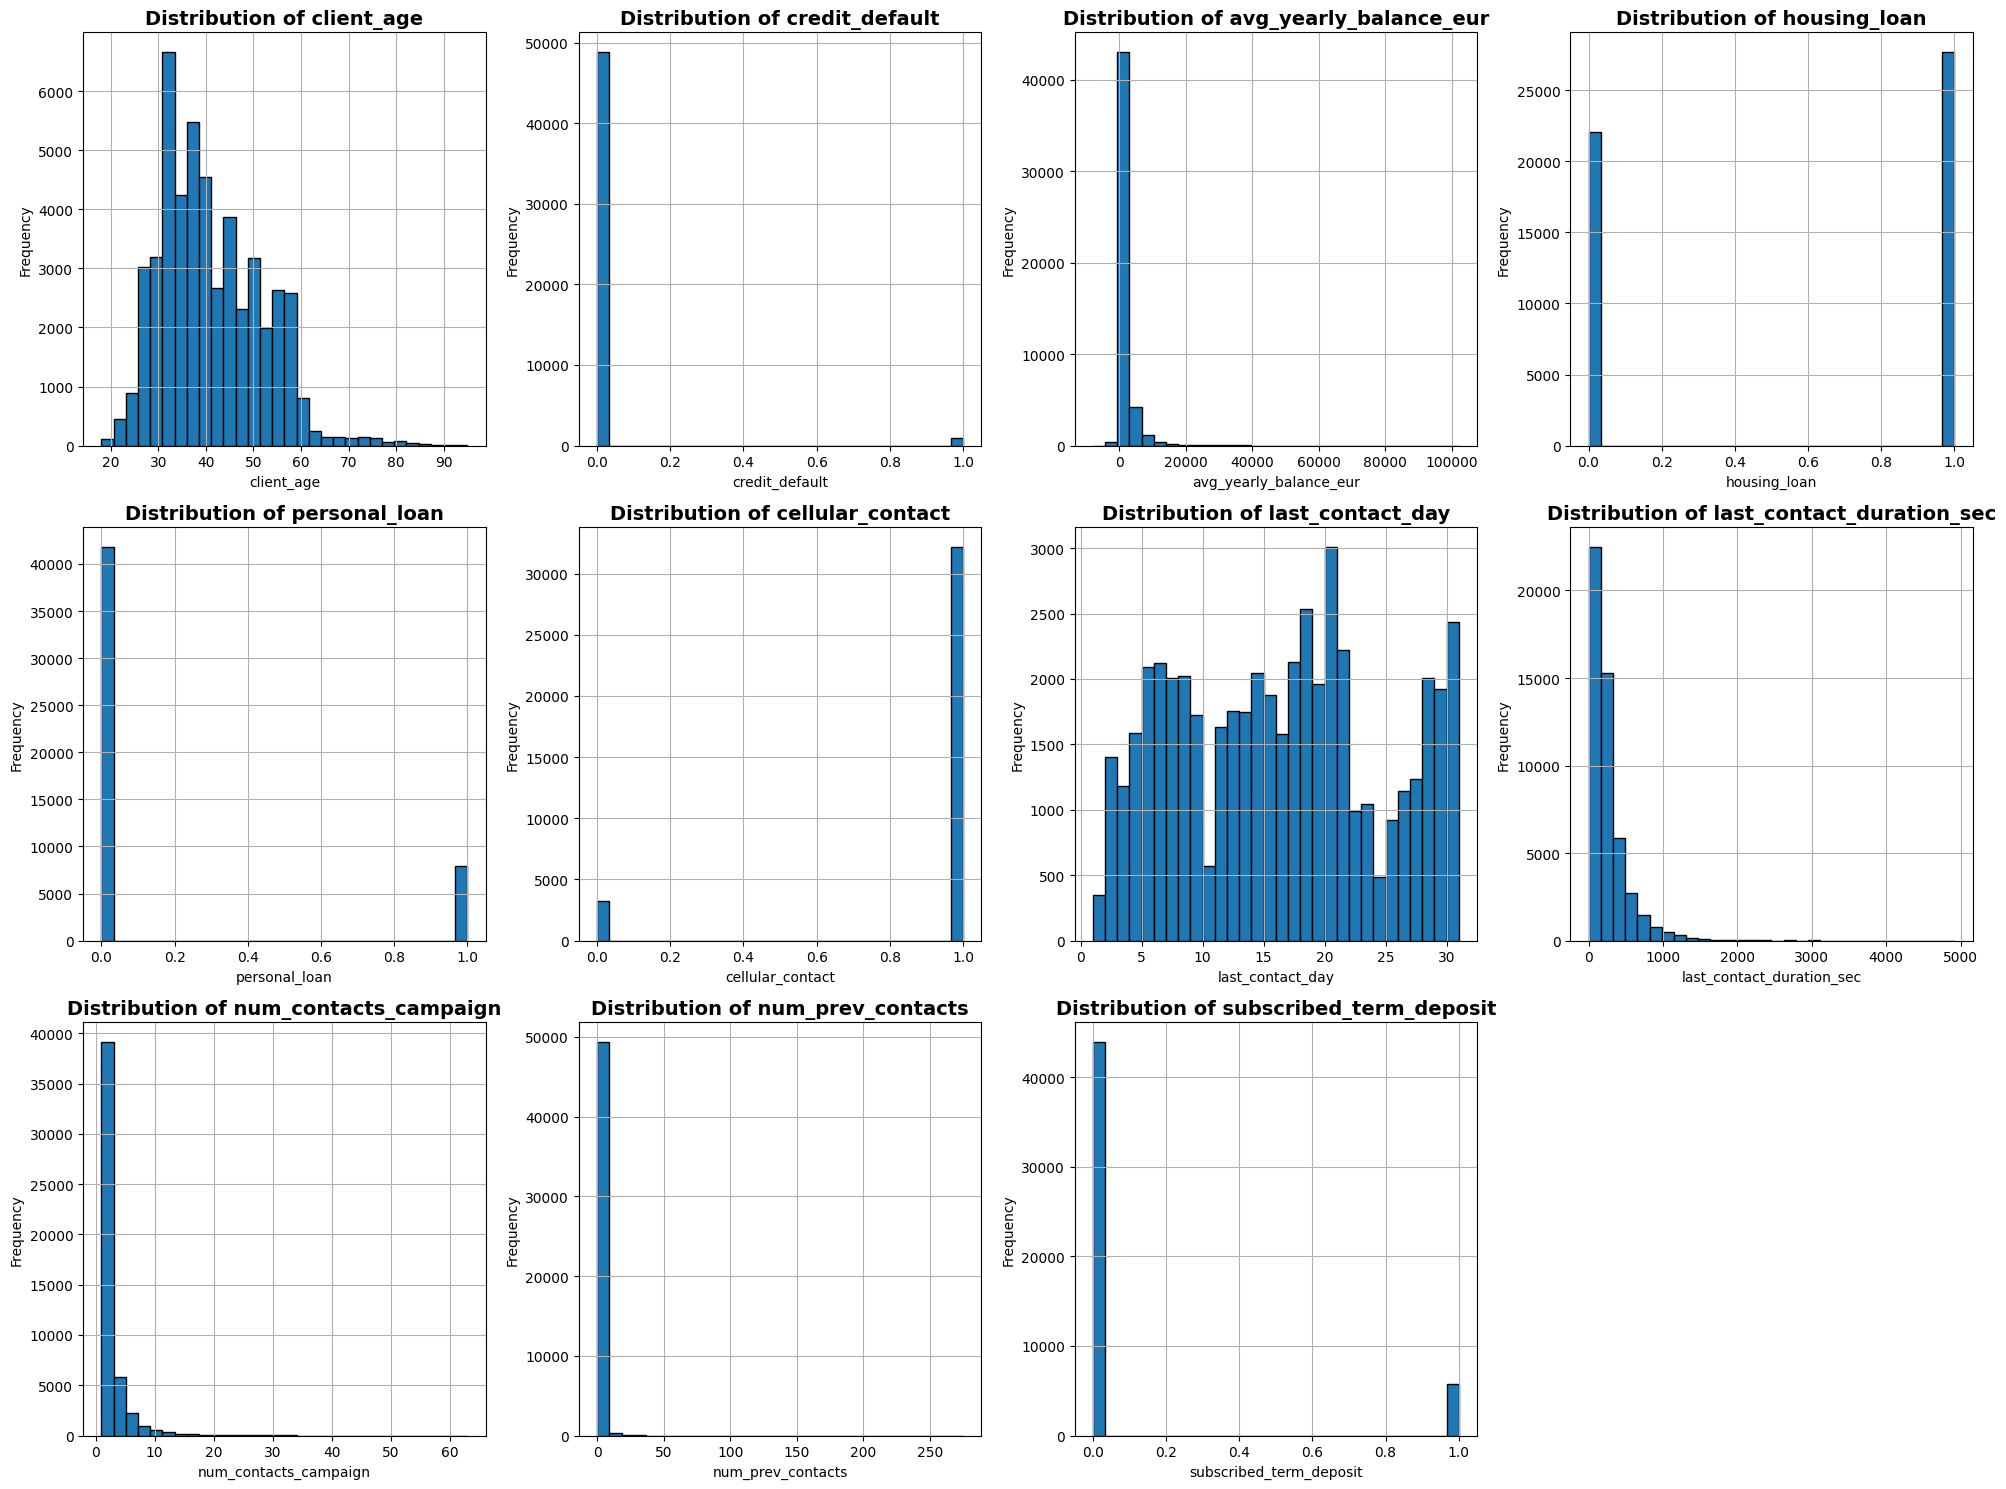

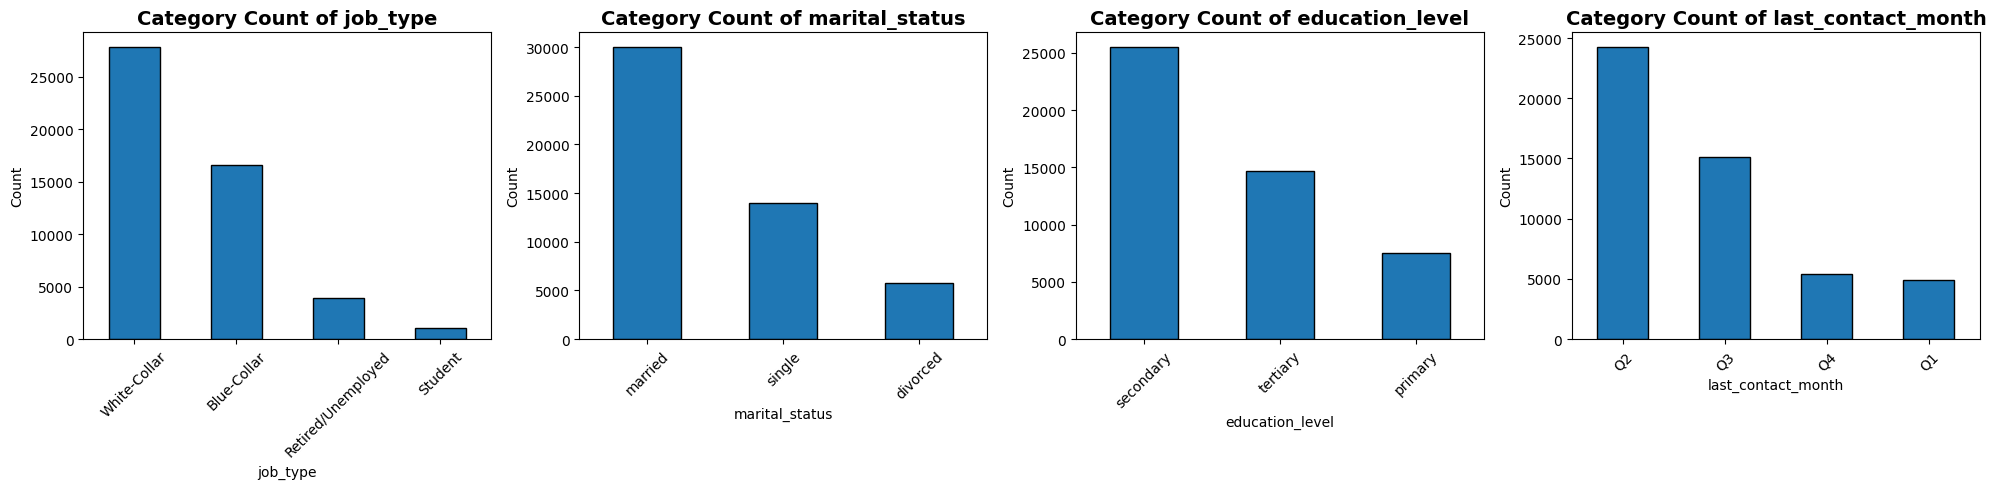

In [57]:
def eda_visualization(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Plot histograms for numerical columns
    num_cols = len(numerical_columns)
    num_rows = (num_cols // 4) + (num_cols % 4 > 0)
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_columns):
        df[col].hist(bins=30, edgecolor='black', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    # Plot bar charts for categorical columns
    cat_cols =  len(categorical_columns)
    cat_rows = (cat_cols // 4) + (cat_cols % 4 > 0)
    fig, axes = plt.subplots(cat_rows, 4, figsize=(20, 5 * cat_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_columns):
        df[col].value_counts().plot(kind='bar', edgecolor='black', ax=axes[i])
        axes[i].set_title(f'Category Count of {col}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

eda_visualization(df)

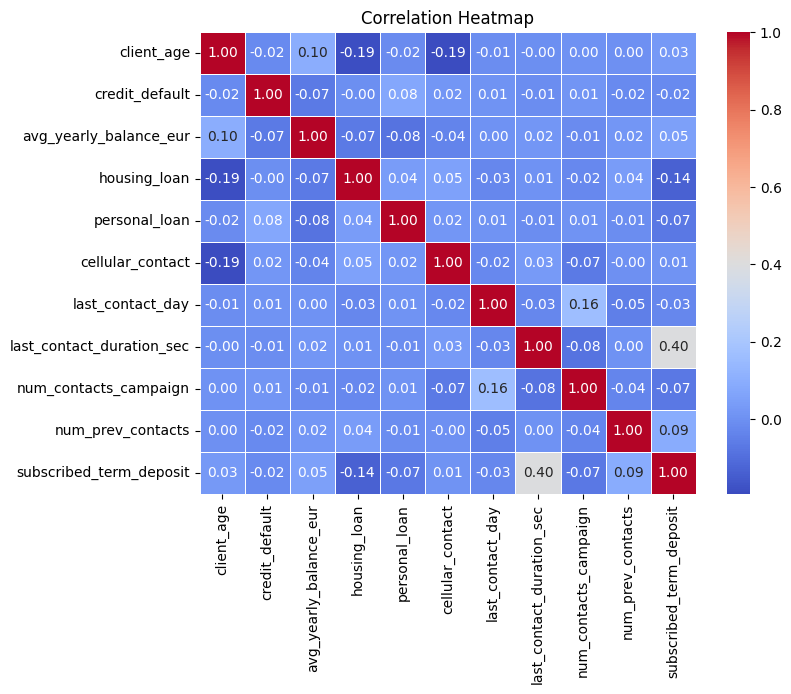

In [39]:
# Compute correlation matrix
correlation_matrix = df_test.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Our job will be to understand what correlates to customers subscribing (y)

In [130]:
df_in = df_test.dropna()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import shap
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_in, drop_first=True)

# Define features and target
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

X.fillna(0, inplace=True)  # Replace NaNs with 0 or any suitable value
y.dropna(inplace=True)

In [122]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [142]:
# Convert boolean columns to integers (0 and 1)
X_train_fixed = X_train.copy()
X_test_fixed = X_test.copy()

# Convert all boolean columns to integers
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train_fixed[bool_cols] = X_train_fixed[bool_cols].astype(int)
X_test_fixed[bool_cols] = X_test_fixed[bool_cols].astype(int)

# Now try SHAP again
feature_names_list = list(X.columns)
shap_values.feature_names = feature_names_list

explainer = shap.Explainer(rf, X_train_fixed, feature_names=feature_names_list)
shap_values = explainer(X_test_fixed)

 99%|===================| 3393/3444 [01:09<00:01]        

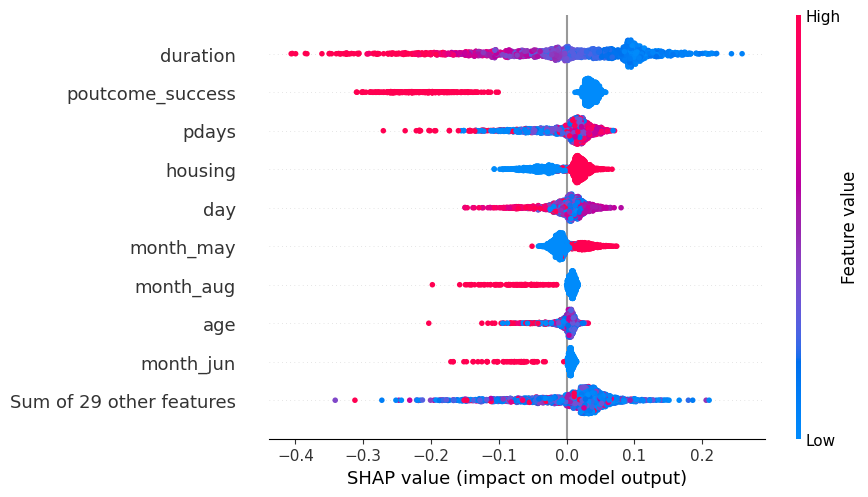

In [ ]:
shap.plots.beeswarm(shap_values[:, :, 0])  # For first class

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      5805
           1       0.58      0.19      0.28       990

    accuracy                           0.86      6795
   macro avg       0.73      0.58      0.60      6795
weighted avg       0.83      0.86      0.83      6795



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


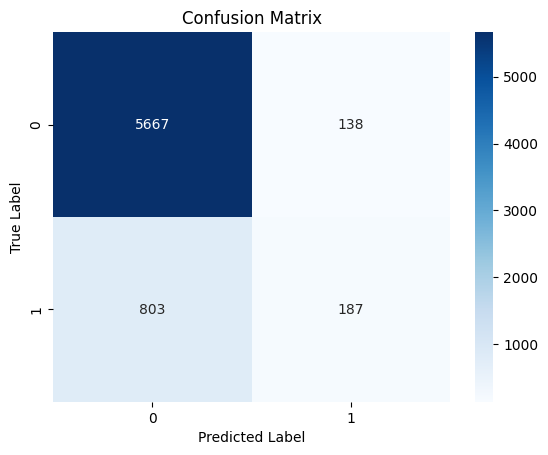

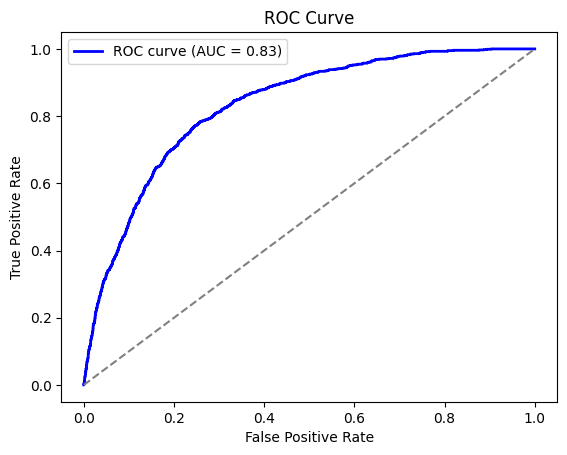

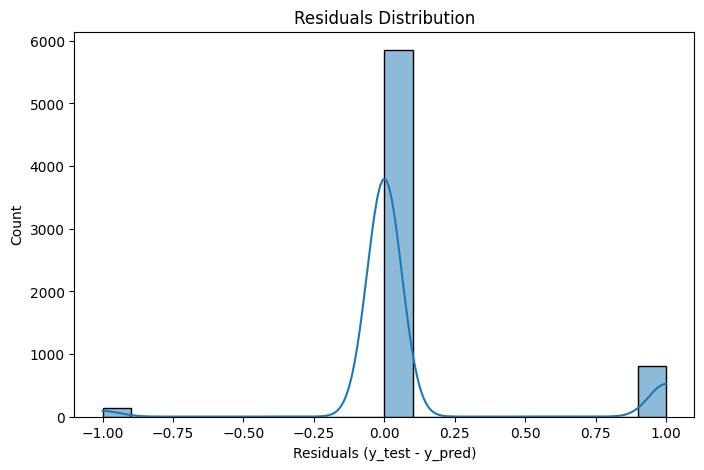

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample  
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

# Log transform skewed numerical features
#df["avg_yearly_balance_eur"] = np.log1p(df["avg_yearly_balance_eur"])
#df["num_contacts_campaign"] = np.log1p(df["num_contacts_campaign"])
#df["last_contact_duration_sec"] = np.log1p(df["last_contact_duration_sec"])

df_ml = df.copy()
# Convert categorical variables into dummy variables
categorical_cols = ["job_type", "marital_status", "education_level", "last_contact_month"]
df_ml = pd.get_dummies(df_ml, columns=categorical_cols, drop_first=True)

# Define features and target
X = df_ml.drop(columns=["subscribed_term_deposit"])
y = df_ml["subscribed_term_deposit"]

# Stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Bootstrapping: Resample training data
n_bootstrap = 500  # Number of bootstrap samples
boot_results = []

for _ in range(n_bootstrap):
    X_resample, y_resample = resample(X_train, y_train, stratify=y_train, random_state=np.random.randint(1000))
    
    # Train logistic regression model
    model = LogisticRegression(max_iter=500)
    model.fit(X_resample, y_resample)
    
    # Store coefficients
    boot_results.append(model.coef_[0])

# Convert bootstrapped coefficients to DataFrame
boot_results_df = pd.DataFrame(boot_results, columns=X.columns)

# Train final model on full training set
final_model = LogisticRegression(max_iter=500)
final_model.fit(X_train, y_train)

# Predictions
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]

# Model evaluation
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel("Residuals (y_test - y_pred)")
plt.ylabel("Count")
plt.title("Residuals Distribution")
plt.show()


In [83]:
from scipy.stats import norm

# Convert bootstrapped coefficients into a DataFrame
boot_results_df_1 = pd.DataFrame(boot_results, columns=X_train.columns)

# Compute mean and standard deviation of bootstrapped coefficients
coef_mean = boot_results_df.mean()
coef_std = boot_results_df.std()

# Compute 95% Confidence Intervals
lower_bound = boot_results_df.quantile(0.025)
upper_bound = boot_results_df.quantile(0.975)

# Compute p-values using a two-tailed test
p_values = 2 * (1 - norm.cdf(abs(coef_mean / coef_std)))

# Print Bootstrapped Coefficients & Corrected p-Values
coef_summary = pd.DataFrame({
    'Coefficient': coef_mean,
    'Std Dev': coef_std,
    '95% CI Lower': lower_bound,
    '95% CI Upper': upper_bound,
    'p-Value': p_values
})

print("Bootstrapped Coefficients and p-Values:")
print(coef_summary)


Bootstrapped Coefficients and p-Values:
                             Coefficient   Std Dev  95% CI Lower  \
client_age                     -0.010869  0.002135     -0.014737   
credit_default                 -0.096925  0.029977     -0.164722   
avg_yearly_balance_eur          0.000016  0.000005      0.000006   
housing_loan                   -1.221853  0.070319     -1.358854   
personal_loan                  -0.698681  0.084605     -0.855507   
cellular_contact               -0.380774  0.055053     -0.481832   
last_contact_day               -0.012343  0.003126     -0.018439   
last_contact_duration_sec       0.003781  0.000117      0.003562   
num_contacts_campaign          -0.144292  0.020677     -0.188908   
num_prev_contacts               0.094317  0.023315      0.037481   
job_type_Retired/Unemployed     0.381383  0.055438      0.289084   
job_type_Student                0.261059  0.074895      0.136596   
job_type_White-Collar           0.046791  0.077582     -0.105266   
marital_